In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

In [16]:
df = pd.read_csv('../data/processed/Totalchargesfixed.csv')
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Demographics vs Churn

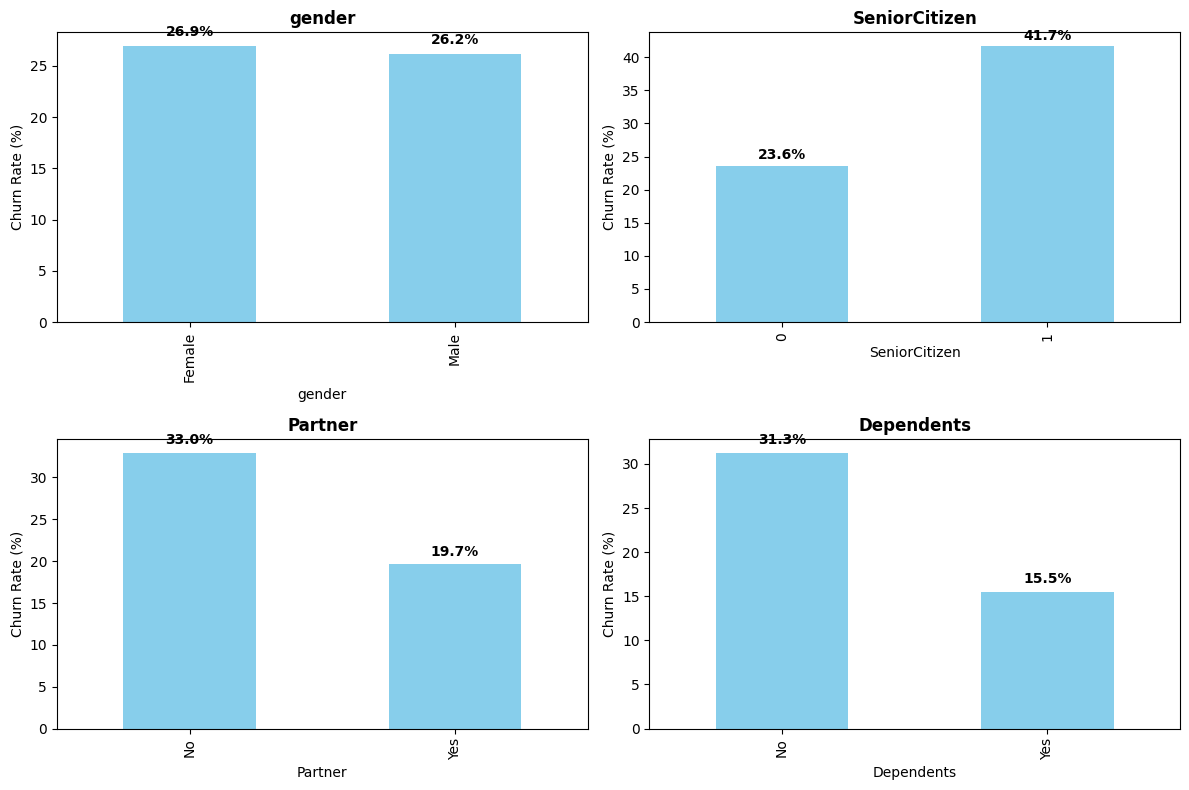

In [17]:
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(demographic_features):
    if feature in df.columns:
        churn_rates = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        churn_rates.plot(kind='bar', ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'{feature}', fontweight='bold')
        axes[idx].set_ylabel('Churn Rate (%)')
        
        # Add percentages on bars
        for i, v in enumerate(churn_rates.values):
            axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 2. Key Services vs Churn

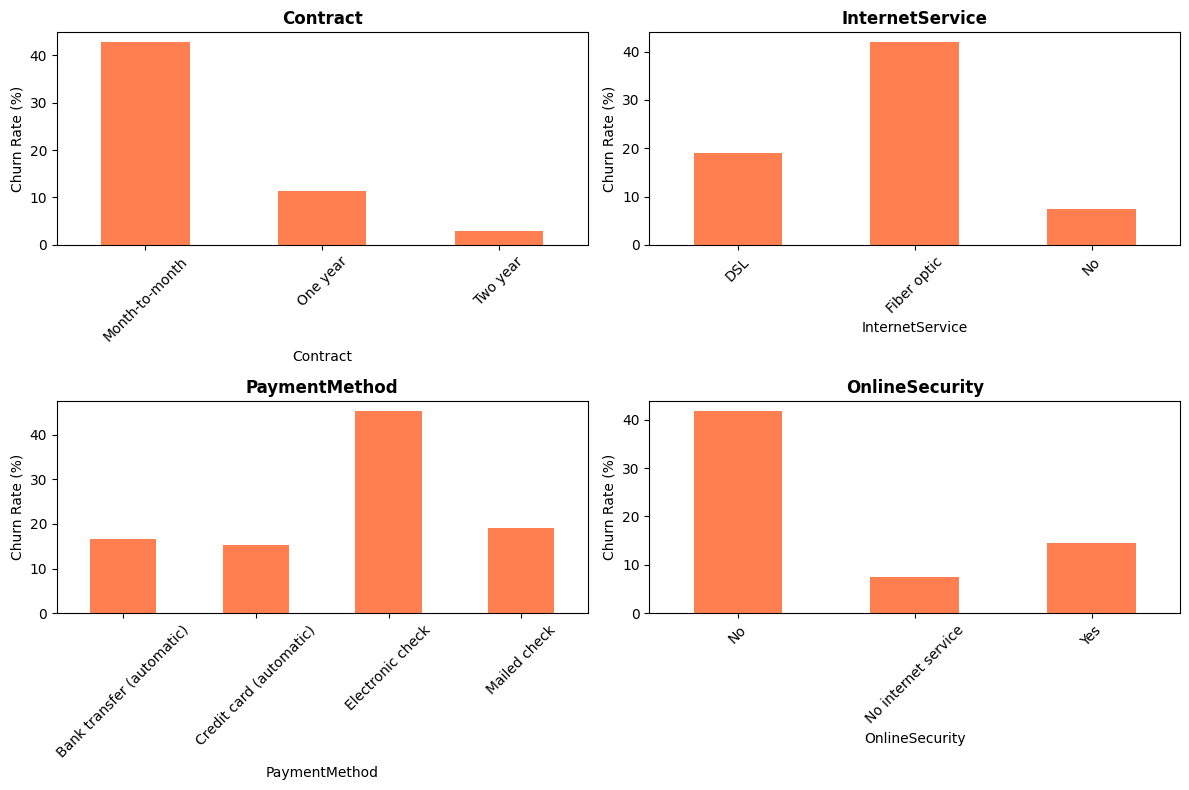

In [19]:
key_services = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(key_services):
    if feature in df.columns:
        churn_rates = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        churn_rates.plot(kind='bar', ax=axes[idx], color='coral', rot=45)
        axes[idx].set_title(f'{feature}', fontweight='bold')
        axes[idx].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

### 3. Financial Features vs Churn

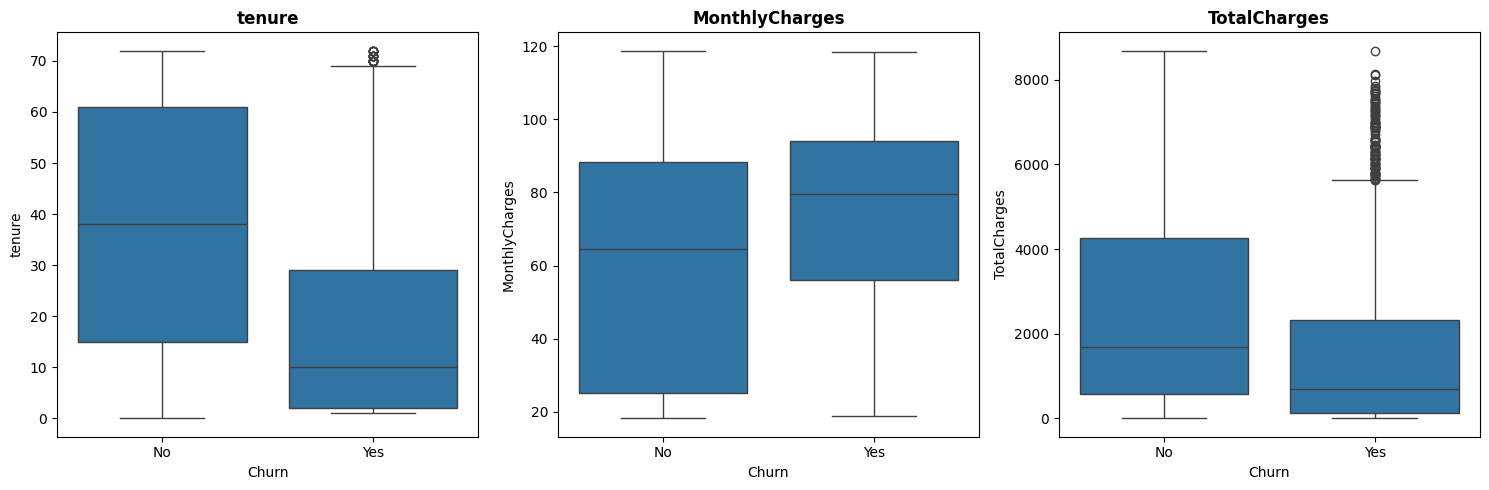

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Statistical Significance

In [21]:

print("Chi-square tests for categorical features:")

significant_features = []

# Test key categorical features
test_features = ['Contract', 'PaymentMethod', 'InternetService', 'Partner']
for feature in test_features:
    if feature in df.columns:
        contingency_table = pd.crosstab(df[feature], df['Churn'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        significant = "✓" if p_value < 0.05 else "✗"
        print(f"{feature}: p-value = {p_value:.4f} {significant}")
        
        if p_value < 0.05:
            significant_features.append(feature)

# Test numerical features
print("\nT-tests for numerical features:")
for feature in numerical_features:
    no_churn = df[df['Churn'] == 'No'][feature]
    churn = df[df['Churn'] == 'Yes'][feature]
    _, p_value = ttest_ind(no_churn, churn)
    
    significant = "✓" if p_value < 0.05 else "✗"
    print(f"{feature}: p-value = {p_value:.4f} {significant}")

Chi-square tests for categorical features:
Contract: p-value = 0.0000 ✓
PaymentMethod: p-value = 0.0000 ✓
InternetService: p-value = 0.0000 ✓
Partner: p-value = 0.0000 ✓

T-tests for numerical features:
tenure: p-value = 0.0000 ✓
MonthlyCharges: p-value = 0.0000 ✓
TotalCharges: p-value = 0.0000 ✓


### 5. Key Insights

In [23]:
print("Highest risk groups:")

# Find highest churn rates
insights = {}
for feature in ['Contract', 'InternetService', 'PaymentMethod']:
    if feature in df.columns:
        rates = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        for category, rate in rates.items():
            insights[f"{feature}_{category}"] = rate

# Show top 5 highest risk
top_risks = sorted(insights.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (group, rate) in enumerate(top_risks, 1):
    print(f"{i}. {group.replace('_', ' = ')}: {rate:.1f}% churn")

print(f"\nSignificant predictors: {', '.join(significant_features)}")


Highest risk groups:
1. PaymentMethod = Electronic check: 45.3% churn
2. Contract = Month-to-month: 42.7% churn
3. InternetService = Fiber optic: 41.9% churn
4. PaymentMethod = Mailed check: 19.1% churn
5. InternetService = DSL: 19.0% churn

Significant predictors: Contract, PaymentMethod, InternetService, Partner
